In [1]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:

colnames = ["time/s\t", "current/A\t", "potential/V"]

path = r'C:\Users\Sebastian\Documents\RWTH\IDS\Aufgaben\py_challenges\01_challenge\01-data\80CO2_20CO' # use your path
all_files = glob.glob(path + "/*.txt")

li = []

for filename in all_files:
    naming = filename.split()
    naming_temp = naming[1]
    naming_co = naming[4]
    naming_co2 = naming[2]
    df = pd.read_csv(filename, index_col=None,sep='\s+', names = colnames, skiprows = 1, dtype = np.float64)
    df["temperature"] = naming_temp
    df["CO2/%"] = naming_co2
    df["CO/%"] = naming_co
    li.append(df)

df8020 = pd.concat(li, axis=0, ignore_index=True)

path = r'C:\Users\Sebastian\Documents\RWTH\IDS\Aufgaben\py_challenges\01_challenge\01-data\50CO2_50CO' # use your path
all_files = glob.glob(path + "/*.txt")

li = []

for filename in all_files:
    naming = filename.split()
    naming_temp = naming[1]
    naming_co = naming[4]
    naming_co2 = naming[2]
    df = pd.read_csv(filename, index_col=None,sep='\s+', names = colnames, skiprows = 1, dtype = np.float64) 
    df["temperature"] = naming_temp
    df["CO2/%"] = naming_co2
    df["CO/%"] = naming_co
    li.append(df)

df5050 = pd.concat(li, axis=0, ignore_index=True)



print(df5050.head())
print(df8020.head())

   time/s\t  current/A\t  potential/V temperature CO2/% CO/%
0       1.0    -0.000019     0.995485       700°C    50   50
1       2.0    -0.000019     0.995485       700°C    50   50
2       3.0    -0.000003     0.995485       700°C    50   50
3       4.0    -0.000019     0.995485       700°C    50   50
4       5.0    -0.000019     0.995485       700°C    50   50
   time/s\t  current/A\t  potential/V temperature CO2/% CO/%
0       1.0    -0.000019     0.939422       698°C    80   20
1       2.0    -0.000019     0.939422       698°C    80   20
2       3.0    -0.000019     0.939422       698°C    80   20
3       4.0    -0.000019     0.939612       698°C    80   20
4       5.0    -0.000019     0.939612       698°C    80   20


In [ ]:
print

In [3]:
df5050["current_density"] = df5050["current/A\t"] / 0.785
df8020["current_density"] = df8020["current/A\t"] / 0.785

print(df5050.head())

   time/s\t  current/A\t  potential/V temperature  current_density
0       1.0    -0.000019     0.995485       700°C        -0.000024
1       2.0    -0.000019     0.995485       700°C        -0.000024
2       3.0    -0.000003     0.995485       700°C        -0.000004
3       4.0    -0.000019     0.995485       700°C        -0.000024
4       5.0    -0.000019     0.995485       700°C        -0.000024


In [4]:
print(df5050.iloc[2,4])

-4.271847133757962e-06


In [5]:
combined_df = df5050.append(df8020)

In [6]:
plt.figure(figsize=(30, 30))

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

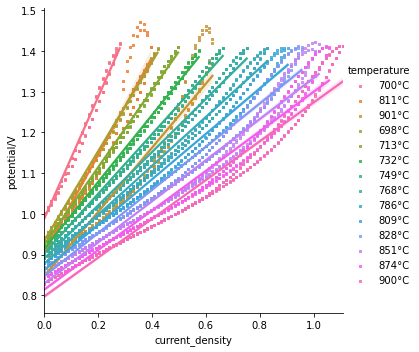

In [7]:
sns.lmplot("current_density", "potential/V", data = combined_df, hue = "temperature", markers=",", scatter_kws={"s": 5})

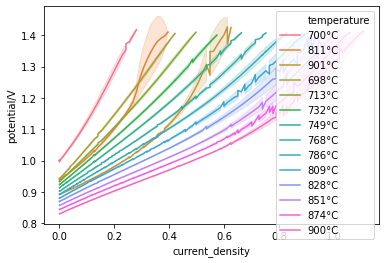

In [7]:
sns.lineplot("current_density", "potential/V", data = combined_df, hue = "temperature")

In [ ]:
colnames = ["CO2/%", "CO/%", "T/°C", OCV/V	ASR/ohm cm^2	J_1.4V/A cm^2]
final_df = pd.Dataframe()

In [53]:
#Determine the Open Circuit Voltage (OCV): this is the potential, where the current is 0

for temp in combined_df['temperature'].unique():
    pot = combined_df[(combined_df["current_density"] == min(combined_df[combined_df['temperature'] == temp].loc[:,'current_density'], key=abs)) 
                      & (combined_df["temperature"]== temp )]['potential/V']
    print(str(temp) + ' has OCV: ' + str(np.mean(pot)))

700°C has OCV: 0.9985768
811°C has OCV: 0.9383674999999998
901°C has OCV: 0.8914455000000002
698°C has OCV: 0.9411702666666666
713°C has OCV: 0.9325807142857142
732°C has OCV: 0.9224320000000003
749°C has OCV: 0.9123314999999999
768°C has OCV: 0.9016512500000001
786°C has OCV: 0.8915025000000002
809°C has OCV: 0.8793877500000002
828°C has OCV: 0.8690933333333334
851°C has OCV: 0.8564208000000001
874°C has OCV: 0.8431558500000002
900°C has OCV: 0.8295676500000002


In [54]:
#Determine the Area Specific Resistance (ARS): Calculate the slopes at 100mA
for temp in combined_df['temperature'].unique():
    ars = combined_df[(combined_df["current_density"] == min(combined_df[combined_df['temperature'] == temp].loc[:,'current_density'], key=lambda x:abs(x-0.1))) 
                      & (combined_df["temperature"]== temp )]['potential/V']
    print(str(temp) + ' has ARS: ' + str(np.mean(ars)))

700°C has ARS: 1.1275175
811°C has ARS: 1.0100250000000002
901°C has ARS: 0.934291
698°C has ARS: 1.042235
713°C has ARS: 1.01905
732°C has ARS: 0.9979575
749°C has ARS: 0.9797115000000001
768°C has ARS: 0.959757
786°C has ARS: 0.946026
809°C has ARS: 0.9287795
828°C has ARS: 0.9144315
851°C has ARS: 0.8984679999999999
874°C has ARS: 0.8835495
900°C has ARS: 0.868441


In [56]:
#determine the current density at 1.4 V
for temp in combined_df['temperature'].unique():
    ars = combined_df[(combined_df["potential/V"] == min(combined_df[combined_df['temperature'] == temp].loc[:,'potential/V'], key=lambda x:abs(x-1.4))) 
                      & (combined_df["temperature"]== temp )]['current_density']
    print(str(temp) + ' current density at 1.4V: ' + str(np.mean(ars)))

700°C current density at 1.4V: 0.267487898089172
811°C current density at 1.4V: 0.39529171974522287
901°C current density at 1.4V: 0.5608127388535031
698°C current density at 1.4V: 0.4077987261146496
713°C current density at 1.4V: 0.48440382165605095
732°C current density at 1.4V: 0.5737108280254777
749°C current density at 1.4V: 0.6501197452229298
768°C current density at 1.4V: 0.739231847133758
786°C current density at 1.4V: 0.8023528662420383
809°C current density at 1.4V: 0.8789566878980892
828°C current density at 1.4V: 0.9172598726114648
851°C current density at 1.4V: 0.9557566878980891
874°C current density at 1.4V: 1.0192687898089172
900°C current density at 1.4V: 1.0704687898089171
